<a href="https://colab.research.google.com/github/Faara34/-Optimisation-of-Travel-Routes-in-Colombo-Using-Python/blob/main/CDSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

What the whole thing does is

It starts with a bad (random) motion, measures how bad it is using action, then slowly improves the motion until the action cannot be reduced anymore.

the action vs iteraction graph is the proof that this learning happened

In [5]:
#defining time settings
#breaking time into small steps so the computer can handle it
#computers cant handle continous time

dt = 0.01 #time step
N = 300 #no. of time points
t = np.linspace(0,N*dt,N)

In [6]:
#physical parameters
m = 1.0 #mass
k = 1.0 #springconstant

In [7]:
#now we guess a random path
#x = position
#x[i] is the position at time t[i]
x = np.random.rand(N)*0.1 #random motion

#boundary conditions (fixed start and end)
x[0] = 1.0 #start position
x[-1] = 1.0  #end position

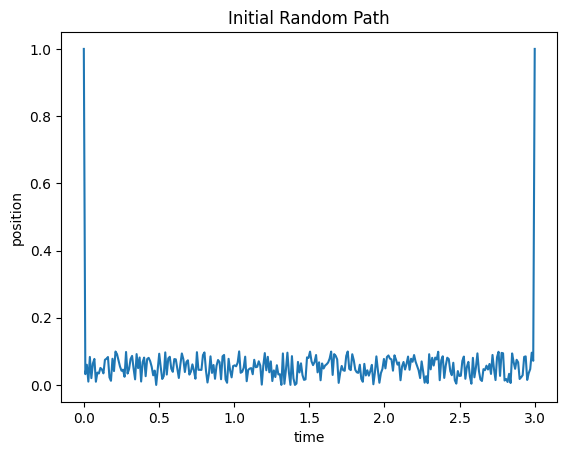

In [8]:
#plotting the initial guess
# you ask the computer to pplot this random path
plt.plot(t,x)
plt.title("Initial Random Path")
plt.xlabel('time')
plt.ylabel('position')
plt.show()

Here's the random motion the computer starts with

In [9]:
#this measures how good or bad a motion path is
#computes action for a given path x(T)
#remember the action equation

def compute_action(x):
    action = 0.0

    for i in range (N-1):
        #velocity (change in posiiton over time)
        v = (x[i + 1]-x[i])/dt

        #kinetic energy
        KE = 0.5 * m * v**2

        #potential energy
        PE = 0.5 * k *x[i]**2

        action += (KE - PE) * dt

    return action


In [10]:
#changing the path to reduce action
#approximating the gradient of the action  by slightly changing one point
#at a time
#the gradient says us which direction to moveto reduce the action

#eps = a tiny number used to make very small changes, nudging the motion just a little
#to see what happens

def compute_gradient(x, eps=1e-5):
#creating an empty gradient array teh same size as x, initially filled with zeros
    grad = np.zeros_like(x)

    # We skip the first and last points (boundary conditions)
    for i in range(1, N - 1):
        # try increasing x[i]
        x[i] += eps
        s1 = compute_action(x)

        # try decreasing x[i]
        x[i] -= 2 * eps
        s2 = compute_action(x)

        # restore value
        x[i] += eps

        # how action changes
        grad[i] = (s1 - s2) / (2 * eps)

    return grad


In [11]:
learning_rate = 0.001
#the computer will ty to improve the path 2000 times
#Each step:computing gradint, updating path andd reducing the action a little
steps = 2000

#storing the action values, storing how the action changes over iterations
action_history = []

#the gradient descent loop
for step in range(steps):

    grad = compute_gradient(x)

    # update motion
    x = x - learning_rate * grad

    # keep start and end fixed
    x[0] = 1.0
    x[-1] = 1.0

    # store action
    S = compute_action(x)
    action_history.append(S)

    if step % 500 == 0:
        print("Step:", step, "Action:", S)

Step: 0 Action: 84.19595326359311
Step: 500 Action: 4.99929966152602
Step: 1000 Action: 3.488820526391325
Step: 1500 Action: 2.8126057866909946


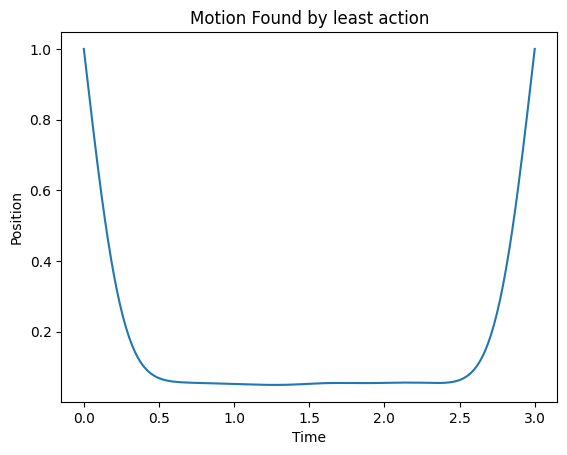

In [12]:
plt.plot(t, x)
plt.title("Motion Found by least action")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()


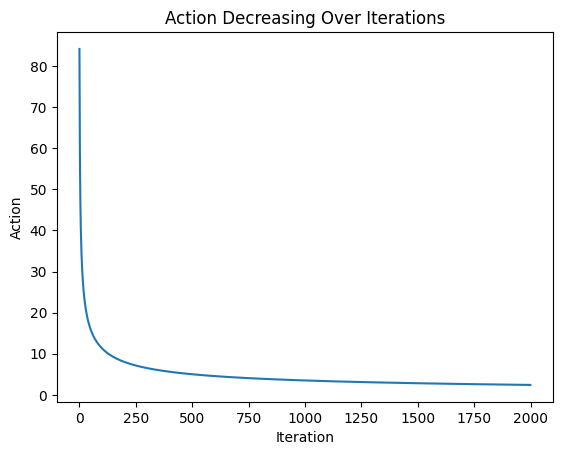

In [13]:
plt.plot(action_history)
plt.title("Action Decreasing Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Action")
plt.show()


What happens in the action curve detailed:
The steep drop at the startt:
Action starts high and drops very qucikly. It means that the initial random motion wwas very bad. and the computer quickly found much better motions.
The curve continues downwards but more slowly, the computer in fine-tuning the motion
the curve becomes almost flat and action approaches a small value (approx 2 or 3) showing the computer has reached the best possible motion with minimum action.

The graph shows the action decreasing rapidly at first and then gradually converging to a minimum, indicating that the system successfully discovered the least-action motion.